In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



Program is used to run a logistical regression model on data describing the results of two tests and whether or not the parts failed or succeed.

y shape: (118,)
y_train shape: (70,)
y_cv shape: (24,)
y_test shape: (24,)


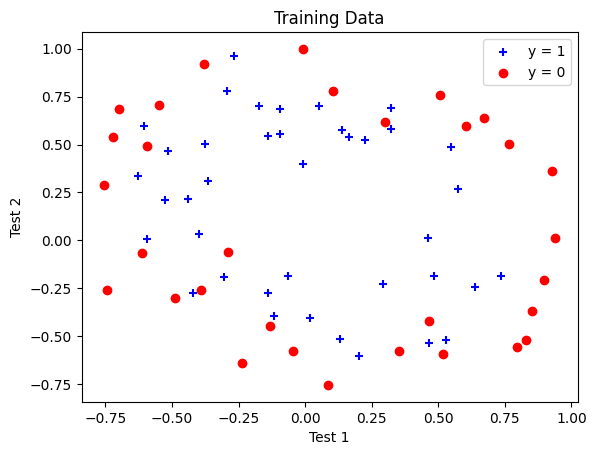

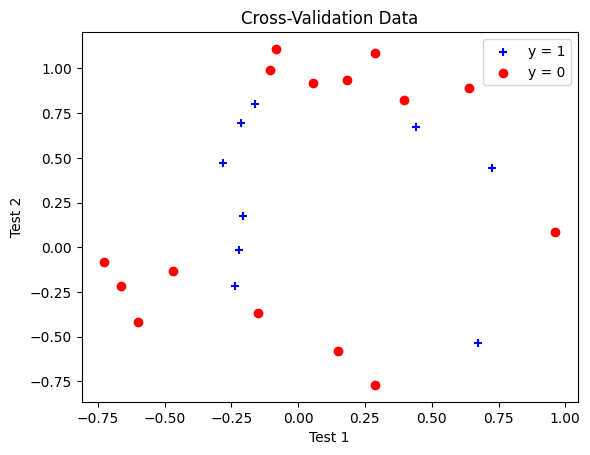

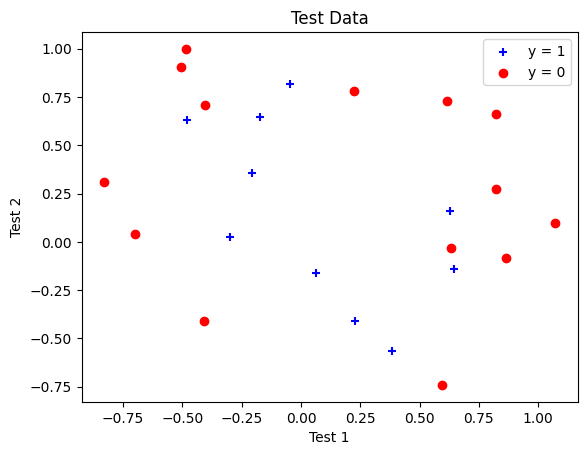

In [87]:
# Load the data
data = np.loadtxt(r"C:\Users\Fnu Aymen\Documents\Machine Learning Data\logregress\ex2data2.txt", delimiter=",")

# Split into columns
X = data[:, [0, 1]]  # First two columns for the tests
y = data[:, 2]      # Third column for the results


X_train, X_cvtest, y_train, y_cvtest = train_test_split(X, y, test_size=0.40, random_state=1)   #Splitting the data into training,cross-validation and test sets
X_cv, X_test, y_cv, y_test = train_test_split(X_cvtest, y_cvtest, test_size=0.50, random_state=1)


print("y shape:", y.shape)
print("y_train shape:", y_train.shape)
print("y_cv shape:", y_cv.shape)
print("y_test shape:", y_test.shape)





# Identify indices of the two classes
pos = y_train == 1      # indices where y equals 1
neg = y_train == 0      # indices where y equals 0

# Create the scatter plot
plt.figure()
plt.scatter(X_train[pos, 0], X_train[pos, 1], c='b', marker='+', label='y = 1')   # class 1
plt.scatter(X_train[neg, 0], X_train[neg, 1], c='r', marker='o', label='y = 0')   # class 0
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("Training Data")
plt.legend()
plt.show()

# Identify indices of the two classes
pos = y_cv == 1      # indices where y equals 1
neg = y_cv == 0      # indices where y equals 0

# Create the scatter plot
plt.figure()
plt.scatter(X_cv[pos, 0], X_cv[pos, 1], c='b', marker='+', label='y = 1')   # class 1
plt.scatter(X_cv[neg, 0], X_cv[neg, 1], c='r', marker='o', label='y = 0')   # class 0
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("Cross-Validation Data")
plt.legend()
plt.show()


# Identify indices of the two classes
pos = y_test == 1      # indices where y equals 1
neg = y_test == 0      # indices where y equals 0

# Create the scatter plot
plt.figure()
plt.scatter(X_test[pos, 0], X_test[pos, 1], c='b', marker='+', label='y = 1')   # class 1
plt.scatter(X_test[neg, 0], X_test[neg, 1], c='r', marker='o', label='y = 0')   # class 0
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("Test Data")
plt.legend()
plt.show()





In [90]:
#Polynomial Features adds interaction terms between the features to capture non-linear relationships.
#StandardScaler scales the features to have zero mean and unit variance, which helps the model converge faster.
#LogisticRegression is the model used to fit the data.
#C is the regularization parameter.

for order in range(1,10):
    pipe = make_pipeline(PolynomialFeatures(order, include_bias=False),
                     StandardScaler(),
                     LogisticRegression(max_iter=5000,C=10000000000000000000000.0))
    pipe.fit(X_train, y_train)   
    y_pred_cv = pipe.predict(X_cv)
    y_pred_train = pipe.predict(X_train)
    accuracy_cv = accuracy_score(y_cv, y_pred_cv)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"Order: {order}, CV Accuracy: {accuracy_cv}, Train Accuracy: {accuracy_train}")

for g in [0.01, 0.05, 0.1, 0.5, 1, 5, 10,100,1000]:
    pipe = make_pipeline(PolynomialFeatures(4, include_bias=False),
                     StandardScaler(),
                     LogisticRegression(max_iter=1000,C=g))
    pipe.fit(X_train, y_train)   
    y_pred_cv = pipe.predict(X_cv)
    y_pred_train = pipe.predict(X_train)
    accuracy_cv = accuracy_score(y_cv, y_pred_cv)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"1/regparam: {g}, CV Accuracy: {accuracy_cv}, Train Accuracy: {accuracy_train}")






Order: 1, CV Accuracy: 0.4583333333333333, Train Accuracy: 0.6
Order: 2, CV Accuracy: 0.7916666666666666, Train Accuracy: 0.8428571428571429
Order: 3, CV Accuracy: 0.7916666666666666, Train Accuracy: 0.8285714285714286
Order: 4, CV Accuracy: 0.75, Train Accuracy: 0.8428571428571429
Order: 5, CV Accuracy: 0.7083333333333334, Train Accuracy: 0.8571428571428571
Order: 6, CV Accuracy: 0.625, Train Accuracy: 0.9571428571428572
Order: 7, CV Accuracy: 0.4583333333333333, Train Accuracy: 0.9714285714285714
Order: 8, CV Accuracy: 0.6666666666666666, Train Accuracy: 1.0
Order: 9, CV Accuracy: 0.5416666666666666, Train Accuracy: 1.0
1/regparam: 0.01, CV Accuracy: 0.5, Train Accuracy: 0.7285714285714285
1/regparam: 0.05, CV Accuracy: 0.6666666666666666, Train Accuracy: 0.7714285714285715
1/regparam: 0.1, CV Accuracy: 0.7083333333333334, Train Accuracy: 0.8
1/regparam: 0.5, CV Accuracy: 0.75, Train Accuracy: 0.8428571428571429
1/regparam: 1, CV Accuracy: 0.75, Train Accuracy: 0.8428571428571429
1/r

Test Accuracy: 0.9166666666666666
Test F1 Score: 0.9090909090909091


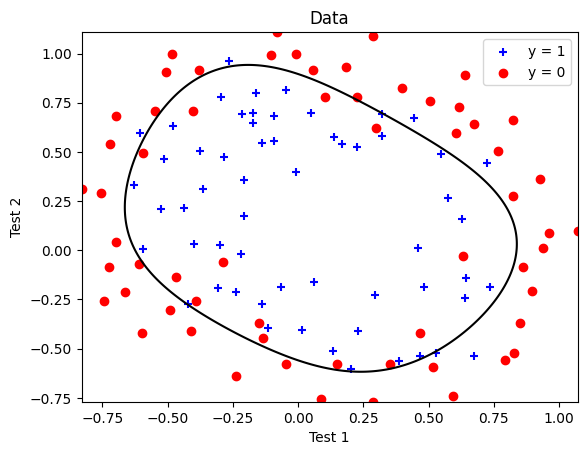

In [96]:
pipe = make_pipeline(PolynomialFeatures(4, include_bias=False),
                     StandardScaler(),
                     LogisticRegression(max_iter=5000,C=1))
pipe.fit(X_train, y_train)   

y_pred_test = pipe.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")
print(f"Test F1 Score: {f1_test}")


pos = y == 1      # indices where y equals 1
neg = y == 0      # indices where y equals 0


# Create the scatter plot
plt.figure()
plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='+', label='y = 1')   # class 1
plt.scatter(X[neg, 0], X[neg, 1], c='r', marker='o', label='y = 0')   # class 0
xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 300),
                     np.linspace(X[:,1].min(), X[:,1].max(), 300))
Z = pipe.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)   # Z=0 contour ⇒ boundary
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("Data")
plt.legend()
plt.show()


